# Single-Task Learning on Cifar100 Dataset (20 Superclasses): A CNN Approach
- **Name**: Minh T. Nguyen & Peter Chen.
- **ECE 6524** - Final Project.
- **Date**: 4/18/2023.
- **Objective**: Build a Single Task CNN model using ResNet152 architecture for 20-classes image classification on Cifar100.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf
from keras.datasets import cifar100
from keras.utils import np_utils, plot_model
from keras.layers import Input, Dropout, Flatten, Dense
from keras.applications.resnet import ResNet152, preprocess_input
from keras import Model, Sequential

# 1. Data Visualization & Preprocessing

In [2]:
num_classes = 20          # number of classes
input_shape = (32, 32, 3) # original input image size

In [3]:
# download data from Keras API
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'coarse')

169001437/169001437 [==============================] - 4s 0us/step


In [4]:
# check dataset size
print(f"X={X_train.shape}, y={y_train.shape}")
print(f"X={X_test.shape}, y={y_test.shape}")

X=(50000, 32, 32, 3), y=(50000, 1)
X=(10000, 32, 32, 3), y=(10000, 1)


## 1.1. Data Visualization

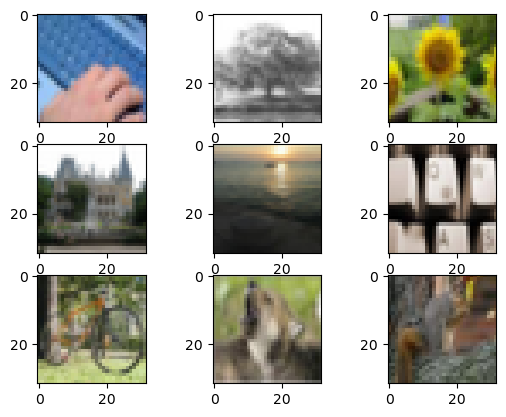

In [5]:
# plot the 9 images
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(X_train[10])
axarr[0,1].imshow(X_train[11])
axarr[0,2].imshow(X_train[12])
axarr[1,0].imshow(X_train[13])
axarr[1,1].imshow(X_train[14])
axarr[1,2].imshow(X_train[15])
axarr[2,0].imshow(X_train[16])
axarr[2,1].imshow(X_train[17])
axarr[2,2].imshow(X_train[18])
plt.show()

## 1.2. Data Preprocessing

In [6]:
# normalize input data
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [7]:
# convert class into one hot encoder
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

y_train:  (50000, 20)
y_test:  (10000, 20)


# 2. Modeling
**Note**: Build a sequential model using ResNet152 architecture

In [8]:
# Define ResNet152 CNN model
def create_model(dropout):
    input_shape = (32, 32, 3)
    
    resnet152_base = ResNet152(weights=None, include_top=False, input_shape=input_shape)
    
    model = Sequential()
    
    model.add(resnet152_base)
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(20, activation='softmax'))
    
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 1, 1, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               5

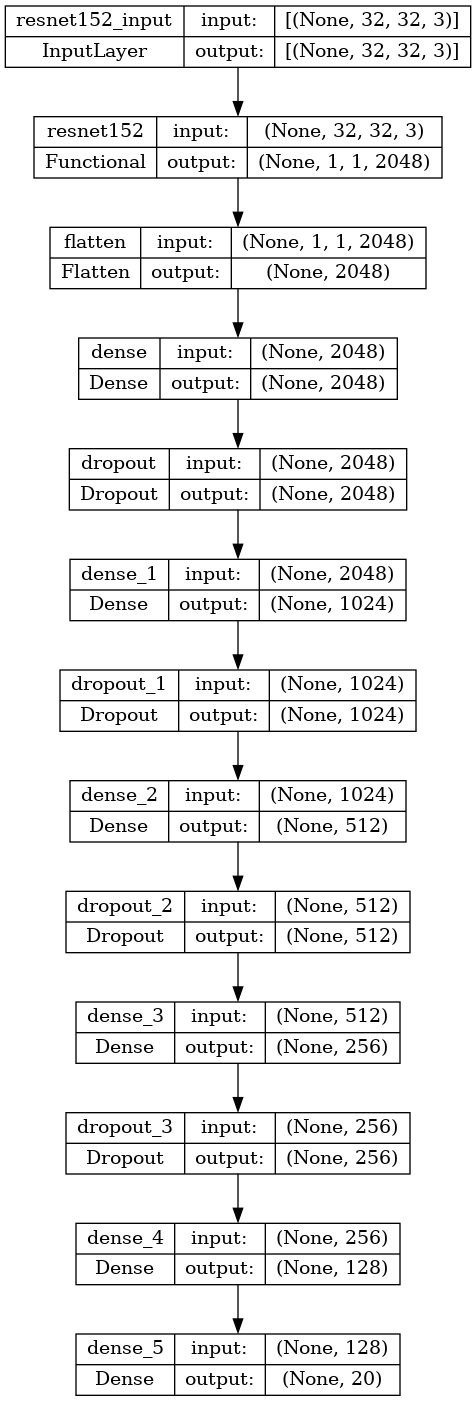

In [9]:
# display and plot model
model = create_model(0)
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
# define number of epochs
epochs = 20

# 2.1 Model 1 (Batch Size = 256, Dropout = 0, Optimizer = Adam)


In [11]:
# define parameters and generate model
batch_size = 256
dropout = 0
optimizer = 'Adam'

model_1 = create_model(dropout)

In [12]:
# compile model
model_1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [13]:
# train model
history_1 = model_1.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
167/167 [==============================] - 146s 213ms/step - loss: 3.0207 - accuracy: 0.0610 - val_loss: 2.9963 - val_accuracy: 0.0544
Epoch 2/20
167/167 [==============================] - 31s 188ms/step - loss: 2.8523 - accuracy: 0.0993 - val_loss: 2.8732 - val_accuracy: 0.0700
Epoch 3/20
167/167 [==============================] - 32s 193ms/step - loss: 2.7565 - accuracy: 0.1144 - val_loss: 2.7461 - val_accuracy: 0.1175
Epoch 4/20
167/167 [==============================] - 31s 187ms/step - loss: 2.6665 - accuracy: 0.1369 - val_loss: 2.7924 - val_accuracy: 0.1196
Epoch 5/20
167/167 [==============================] - 32s 194ms/step - loss: 2.6057 - accuracy: 0.1532 - val_loss: 2.6632 - val_accuracy: 0.1335
Epoch 6/20
167/167 [==============================] - 32s 194ms/step - loss: 2.5376 - accuracy: 0.1691 - val_loss: 2.5905 - val_accuracy: 0.1661
Epoch 7/20
167/167 [==============================] - 31s 188ms/step - loss: 2.5076 - accuracy: 0.1808 - val_loss: 2.6446 - val_a

In [14]:
# train model results
print('Train Loss:', history_1.history['loss'][-1])
print('Train Acc:', history_1.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_1.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.263547420501709
Train Acc: 0.29237645864486694

Test Loss: 2.4566338062286377
Test Acc: 0.22859999537467957


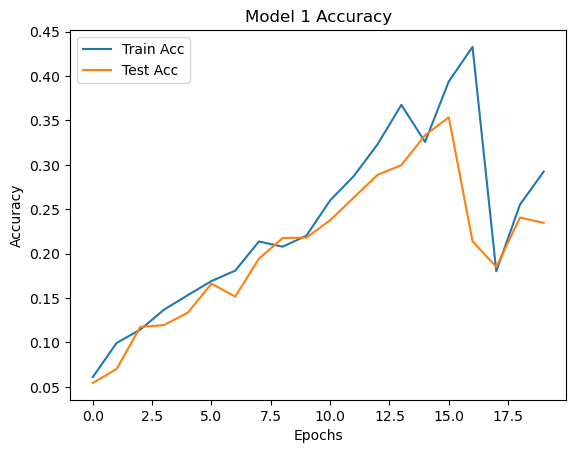

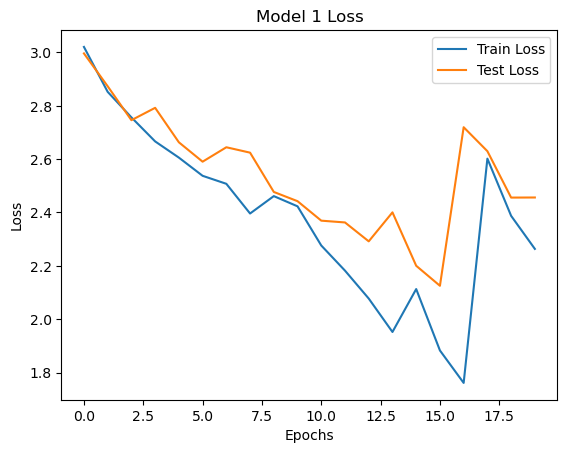

In [15]:
# Accuracy Plot
plt.plot(history_1.history['accuracy'], label='Train Acc')
plt.plot(history_1.history['val_accuracy'], label='Test Acc')
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Test Loss')
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.2 Model 2 (Batch Size = 128, Dropout = 0, Optimizer = Adam)

In [16]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'Adam'

model_2 = create_model(dropout)

In [17]:
# compile model
model_2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [18]:
# train model
history_2 = model_2.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 152s 146ms/step - loss: 2.8955 - accuracy: 0.0898 - val_loss: 2.8428 - val_accuracy: 0.1011
Epoch 2/20
333/333 [==============================] - 46s 139ms/step - loss: 2.7102 - accuracy: 0.1306 - val_loss: 2.8502 - val_accuracy: 0.1015
Epoch 3/20
333/333 [==============================] - 46s 138ms/step - loss: 2.6667 - accuracy: 0.1415 - val_loss: 2.7537 - val_accuracy: 0.1348
Epoch 4/20
333/333 [==============================] - 46s 139ms/step - loss: 2.6308 - accuracy: 0.1511 - val_loss: 2.6451 - val_accuracy: 0.1545
Epoch 5/20
333/333 [==============================] - 46s 139ms/step - loss: 2.4575 - accuracy: 0.2107 - val_loss: 2.5031 - val_accuracy: 0.2123
Epoch 6/20
333/333 [==============================] - 47s 140ms/step - loss: 2.3581 - accuracy: 0.2444 - val_loss: 2.9994 - val_accuracy: 0.1333
Epoch 7/20
333/333 [==============================] - 46s 139ms/step - loss: 2.6351 - accuracy: 0.1691 - val_loss: 2.5836 - val_a

In [19]:
# train model results
print('Train Loss:', history_2.history['loss'][-1])
print('Train Acc:', history_2.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_2.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.026801586151123
Train Acc: 0.359129399061203

Test Loss: 2.1475446224212646
Test Acc: 0.328000009059906


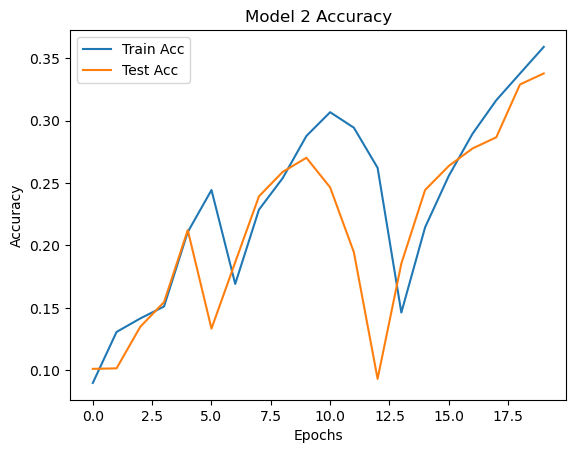

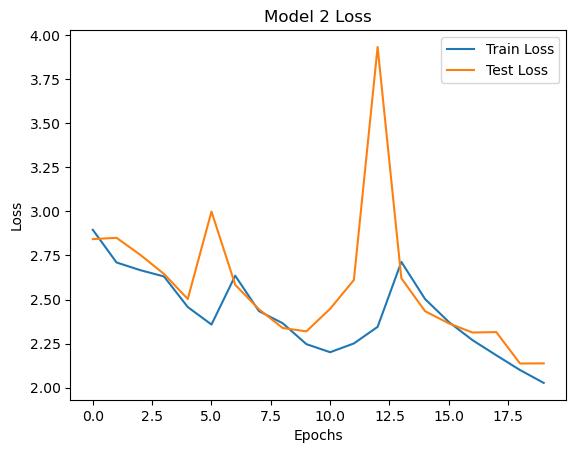

In [20]:
# Accuracy Plot
plt.plot(history_2.history['accuracy'], label='Train Acc')
plt.plot(history_2.history['val_accuracy'], label='Test Acc')
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Test Loss')
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.3 Model 3 (Batch Size = 256, Dropout = 0.5, Optimizer = Adam)

In [21]:
# define parameters and generate model
batch_size = 128
dropout = 0.5
optimizer = 'Adam'

model_3 = create_model(dropout)

In [22]:
# compile model
model_3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [23]:
# train model
history_3 = model_3.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 152s 148ms/step - loss: 3.1805 - accuracy: 0.0504 - val_loss: 2.9956 - val_accuracy: 0.0459
Epoch 2/20
333/333 [==============================] - 46s 140ms/step - loss: 2.9774 - accuracy: 0.0708 - val_loss: 2.9589 - val_accuracy: 0.0715
Epoch 3/20
333/333 [==============================] - 46s 139ms/step - loss: 2.8956 - accuracy: 0.0848 - val_loss: 2.8153 - val_accuracy: 0.1087
Epoch 4/20
333/333 [==============================] - 47s 140ms/step - loss: 2.8054 - accuracy: 0.1028 - val_loss: 2.8092 - val_accuracy: 0.1127
Epoch 5/20
333/333 [==============================] - 46s 139ms/step - loss: 2.7547 - accuracy: 0.1136 - val_loss: 2.7813 - val_accuracy: 0.1111
Epoch 6/20
333/333 [==============================] - 46s 140ms/step - loss: 2.7140 - accuracy: 0.1279 - val_loss: 2.7979 - val_accuracy: 0.1080
Epoch 7/20
333/333 [==============================] - 46s 139ms/step - loss: 2.6953 - accuracy: 0.1341 - val_loss: 2.7903 - val_a

In [24]:
# train model results
print('Train Loss:', history_3.history['loss'][-1])
print('Train Acc:', history_3.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_3.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.506929874420166
Train Acc: 0.18030588328838348

Test Loss: 2.5391428470611572
Test Acc: 0.16680000722408295


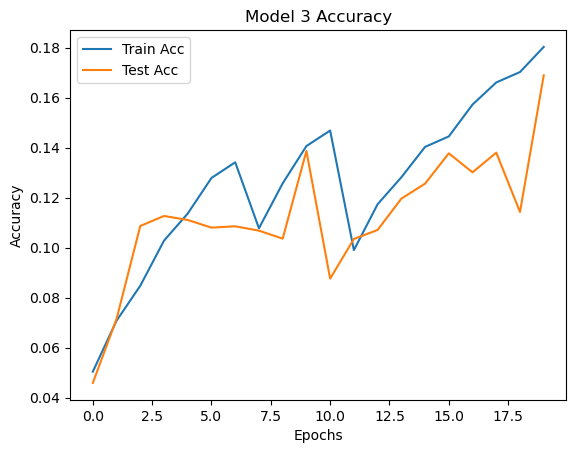

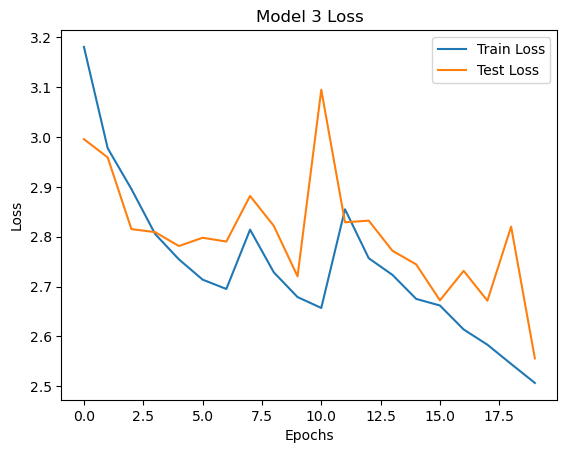

In [25]:
# Accuracy Plot
plt.plot(history_3.history['accuracy'], label='Train Acc')
plt.plot(history_3.history['val_accuracy'], label='Test Acc')
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Test Loss')
plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.4 Model 4 (Batch Size = 256, Dropout = 0, Optimizer = SGD)

In [26]:
# define parameters and generate model
batch_size = 256
dropout = 0
optimizer = 'SGD'

model_4 = create_model(dropout)

In [27]:
# compile model
model_4.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [28]:
# train model
history_4 = model_4.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
167/167 [==============================] - 80s 204ms/step - loss: 2.9416 - accuracy: 0.0803 - val_loss: 69542510592.0000 - val_accuracy: 0.0459
Epoch 2/20
167/167 [==============================] - 30s 181ms/step - loss: 2.8100 - accuracy: 0.1283 - val_loss: 263.4214 - val_accuracy: 0.0539
Epoch 3/20
167/167 [==============================] - 31s 186ms/step - loss: 2.7491 - accuracy: 0.1415 - val_loss: 635.1763 - val_accuracy: 0.0528
Epoch 4/20
167/167 [==============================] - 30s 181ms/step - loss: 2.7496 - accuracy: 0.1324 - val_loss: 37.8523 - val_accuracy: 0.0593
Epoch 5/20
167/167 [==============================] - 31s 187ms/step - loss: 2.7058 - accuracy: 0.1416 - val_loss: 121.4436 - val_accuracy: 0.0513
Epoch 6/20
167/167 [==============================] - 30s 181ms/step - loss: 2.6974 - accuracy: 0.1461 - val_loss: 7.6472 - val_accuracy: 0.0459
Epoch 7/20
167/167 [==============================] - 30s 182ms/step - loss: 2.6675 - accuracy: 0.1533 - val_loss

In [29]:
# train model results
print('Train Loss:', history_4.history['loss'][-1])
print('Train Acc:', history_4.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_4.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.4209930896759033
Train Acc: 0.2294352948665619

Test Loss: 4.487803936004639
Test Acc: 0.09229999780654907


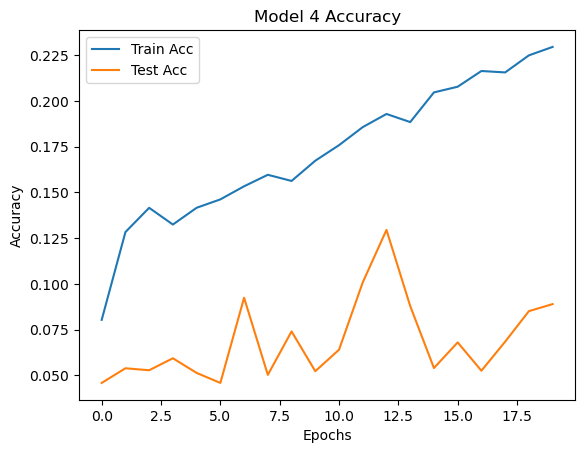

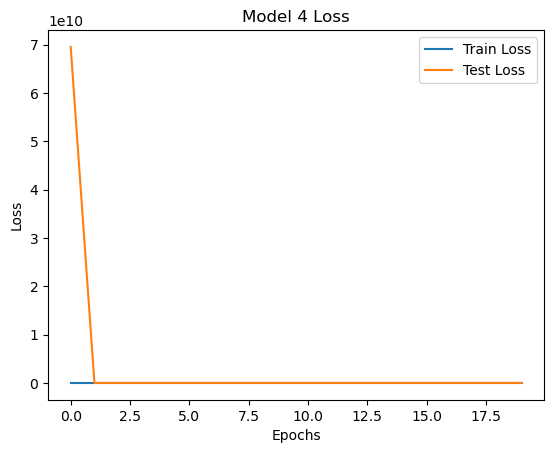

In [30]:
# Accuracy Plot
plt.plot(history_4.history['accuracy'], label='Train Acc')
plt.plot(history_4.history['val_accuracy'], label='Test Acc')
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_4.history['loss'], label='Train Loss')
plt.plot(history_4.history['val_loss'], label='Test Loss')
plt.title('Model 4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.5 Model 5 (Batch Size = 128, Dropout = 0, Optimizer = SGD)

In [31]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'SGD'

model_5 = create_model(dropout)

In [32]:
# compile model
model_5.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [33]:
# train model
history_5 = model_5.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 92s 143ms/step - loss: 2.8811 - accuracy: 0.1028 - val_loss: 15358093307150336.0000 - val_accuracy: 0.0476
Epoch 2/20
333/333 [==============================] - 44s 132ms/step - loss: 2.7636 - accuracy: 0.1389 - val_loss: 8.7799 - val_accuracy: 0.0583
Epoch 3/20
333/333 [==============================] - 45s 134ms/step - loss: 2.6572 - accuracy: 0.1704 - val_loss: 7.9501 - val_accuracy: 0.0539
Epoch 4/20
333/333 [==============================] - 44s 132ms/step - loss: 2.6010 - accuracy: 0.1876 - val_loss: 113.6186 - val_accuracy: 0.0476
Epoch 5/20
333/333 [==============================] - 44s 132ms/step - loss: 2.6118 - accuracy: 0.1827 - val_loss: 5.9917 - val_accuracy: 0.0507
Epoch 6/20
333/333 [==============================] - 45s 134ms/step - loss: 2.5726 - accuracy: 0.1929 - val_loss: 4.8985 - val_accuracy: 0.0507
Epoch 7/20
333/333 [==============================] - 44s 133ms/step - loss: 2.5470 - accuracy: 0.2005 - val_los

In [34]:
# train model results
print('Train Loss:', history_5.history['loss'][-1])
print('Train Acc:', history_5.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_5.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.2781617641448975
Train Acc: 0.29056471586227417

Test Loss: 2.9255850315093994
Test Acc: 0.125


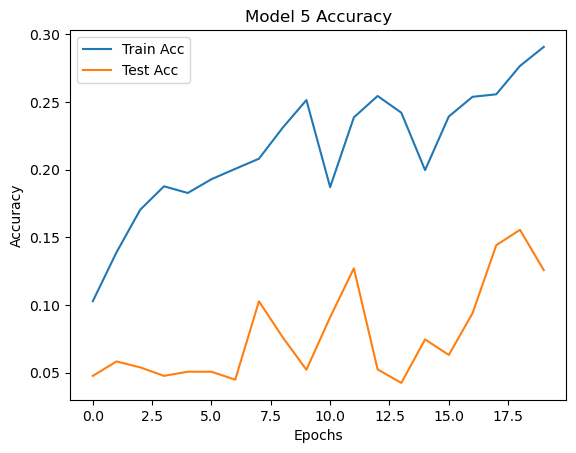

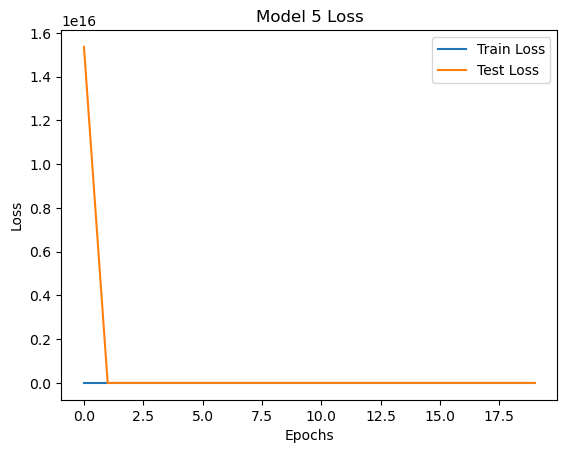

In [35]:
# Accuracy Plot
plt.plot(history_5.history['accuracy'], label='Train Acc')
plt.plot(history_5.history['val_accuracy'], label='Test Acc')
plt.title('Model 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_5.history['loss'], label='Train Loss')
plt.plot(history_5.history['val_loss'], label='Test Loss')
plt.title('Model 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.6 Model 6 (Batch Size = 256, Dropout = 0.5, Optimizer = SGD)

In [36]:
# define parameters and generate model
batch_size = 256
dropout = 0.5
optimizer = 'SGD'

model_6 = create_model(dropout)

In [37]:
# compile model
model_6.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [38]:
# train model
history_6 = model_6.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
167/167 [==============================] - 77s 201ms/step - loss: 3.2161 - accuracy: 0.0512 - val_loss: 128.1122 - val_accuracy: 0.0555
Epoch 2/20
167/167 [==============================] - 30s 181ms/step - loss: 3.0612 - accuracy: 0.0517 - val_loss: 3.0032 - val_accuracy: 0.0560
Epoch 3/20
167/167 [==============================] - 31s 187ms/step - loss: 3.0271 - accuracy: 0.0513 - val_loss: 3.1479 - val_accuracy: 0.0523
Epoch 4/20
167/167 [==============================] - 30s 181ms/step - loss: 3.0135 - accuracy: 0.0516 - val_loss: 4.1763 - val_accuracy: 0.0364
Epoch 5/20
167/167 [==============================] - 30s 181ms/step - loss: 3.0092 - accuracy: 0.0512 - val_loss: 3.1062 - val_accuracy: 0.0545
Epoch 6/20
167/167 [==============================] - 31s 187ms/step - loss: 2.9928 - accuracy: 0.0559 - val_loss: 3.0046 - val_accuracy: 0.0609
Epoch 7/20
167/167 [==============================] - 31s 187ms/step - loss: 2.9811 - accuracy: 0.0627 - val_loss: 18.6822 - val

In [39]:
# train model results
print('Train Loss:', history_6.history['loss'][-1])
print('Train Acc:', history_6.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_6.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.898237943649292
Train Acc: 0.08555293828248978

Test Loss: 2.971282958984375
Test Acc: 0.06520000100135803


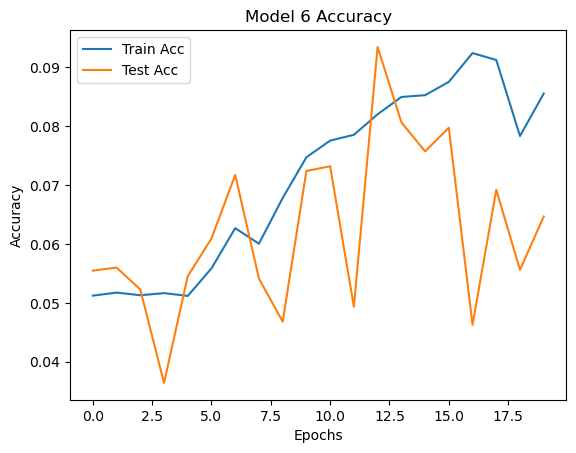

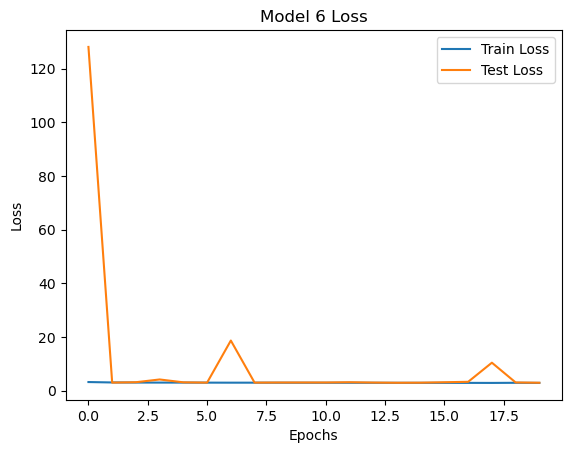

In [40]:
# Accuracy Plot
plt.plot(history_6.history['accuracy'], label='Train Acc')
plt.plot(history_6.history['val_accuracy'], label='Test Acc')
plt.title('Model 6 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_6.history['loss'], label='Train Loss')
plt.plot(history_6.history['val_loss'], label='Test Loss')
plt.title('Model 6 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()